# Preliminary analysis and clean up of denier_inst_articles_withMedia dataset
This dateset is not labeled. It was acquired by webscraping google news with search terms " 'institution' 'climate change'" where institution are the names of institutions flagged as spreading climate change misinformation by desmogblog.

Some of the articles could be climate change "believers" calling them out and we don't want these articles to be mislabeled.

Here, we try to assign correct labels to the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load corpus of newspaper articles
data = pd.read_excel('denier_inst_articles_withMedia.xlsx')

# load list of climate change denier inssitutions
deniers = pd.read_excel('denier institutions.xlsx')

In [51]:
# Flag articles from known denier institution media as denier (1). Rest as not denier (0)
n_deny_art = 0
denier_arts = []
for m in data['media']:
    if m in deniers['denier institutions'].array:
        n_deny_art += 1
        denier_arts.append(1)
    else:
        denier_arts.append(0)
n_deny_art

128

In [102]:
# Get media of articles flagged as denier to check if the media really match with denier institution names
ind_denier_arts = np.where((np.array(denier_arts) == 1.0))[0]
test = [data['media'][i] for i in ind_denier_arts]

<AxesSubplot:>

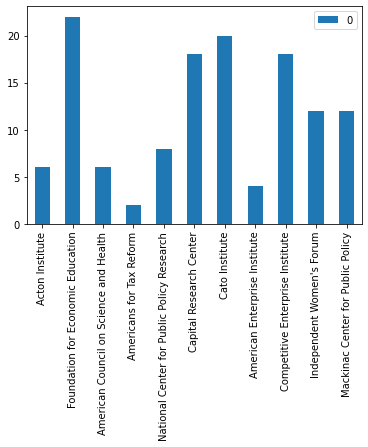

In [106]:
from collections import Counter

letter_counts = Counter(test)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

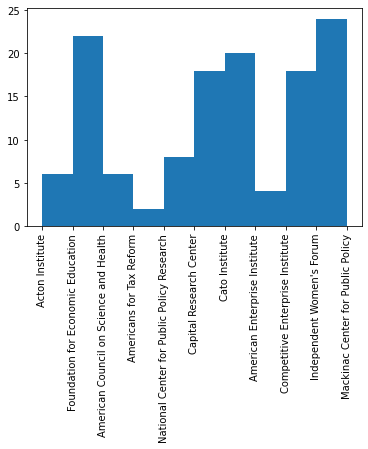

In [70]:
plt.hist(test)
plt.xticks(rotation=90)

In [82]:
t

{'t': [58                                 Acton Institute
  63                                 Acton Institute
  66                                 Acton Institute
  67                                 Acton Institute
  72                                 Acton Institute
                             ...                    
  2750    National Center for Public Policy Research
  2757    National Center for Public Policy Research
  2763    National Center for Public Policy Research
  2766    National Center for Public Policy Research
  2772    National Center for Public Policy Research
  Name: media, Length: 128, dtype: object]}

In [81]:
t = {'t' : test}
tdf = pd.DataFrame(t)
tdf.value_counts().plot(kind='bar', figsize=(20,20))

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [18]:
medias = data['media']

In [21]:
medias[medias == 'Acton Institute']

58    Acton Institute
63    Acton Institute
66    Acton Institute
67    Acton Institute
72    Acton Institute
75    Acton Institute
Name: media, dtype: object

In [22]:
if 'Acton Institute' in deniers:
    print('yep')

In [23]:
deniers

,denier institutions
0,55 Tufton Street
1,60 Plus Association
2,Accuracy in Media
3,Acton Institute
4,Adam Smith Institute
...,...
230,Washington Policy Center
231,Western Fuels Association
232,Western States Petroleum Association
233,World Climate Report


In [41]:
type(deniers['denier institutions'].array)

pandas.core.arrays.numpy_.PandasArray

In [39]:
type(deniers)

pandas.core.frame.DataFrame